![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


I'll explore the `students` data using PostgreSQL to find out if I would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns:

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

### 1. Exploring the **data**

First of all let's get familiar with data and count how many records we have.

In [2]:
-- Run this code to save the CSV file as students
SELECT * 
FROM 'students.csv';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,247,None,None,None,None,None,None,None,None,None


In [3]:
SELECT COUNT(*) AS total_records
FROM 'students.csv';

,total_records
0,286


In [4]:
SELECT COUNT(*) as 'count_inter_dom', inter_dom
FROM 'students.csv'
GROUP BY inter_dom;


,count_inter_dom,inter_dom
0,201,Inter
1,67,Dom
2,18,None


As we can see table contains null values, let's get rid of them to get clearer view

In [5]:
SELECT COUNT(*) as 'count_inter_dom', inter_dom
FROM 'students.csv'
GROUP BY inter_dom
HAVING inter_dom IS NOT NULL;

,count_inter_dom,inter_dom
0,201,Inter
1,67,Dom


Now our table contains records about 201 international and 67 domestic students. 

### 2. Filtering **data.**

Next step is to filer the data to see how it differs between the student types.

In [6]:
SELECT *
FROM 'students.csv'
WHERE inter_dom='Inter';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,5,High,None,Yes,No,No,No,0,Min,34,23,9,11,8,11,2,27,91,5,5,6,3,2,1,4,1,3,4,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,4,High,None,No,No,No,No,2,Min,48,8,7,5,4,3,2,10,39,7,7,7,4,4,4,4,1,1,1,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,4,High,Yes,Yes,No,No,No,2,Min,41,13,4,7,6,4,3,14,51,3,3,3,1,1,2,1,1,1,1,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,3,Average,No,No,No,No,No,3,Min,37,16,10,10,8,6,4,21,75,5,5,5,5,5,2,2,2,4,4,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,3,Average,Yes,No,No,No,No,3,Min,37,15,12,5,8,7,4,31,82,5,5,5,2,5,2,5,5,4,4,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Inter,SEA,Male,Under,21,3,3,Medium,4,High,4,High,Yes,Yes,No,No,No,6,Mild,37,23,8,11,8,6,4,22,82,3,2,2,2,4,2,4,2,6,4,4.0,No,No,No,No,No,No,No,No,Yes,No,No
197,Inter,SEA,Female,Under,20,2,1,Short,2,Low,4,High,Yes,No,No,No,No,7,Mild,16,29,18,17,17,12,8,44,145,7,1,3,3,4,4,4,4,7,1,4.0,Yes,No,No,No,No,No,No,No,Yes,No,No
198,Inter,SEA,Female,Under,21,3,3,Medium,2,Low,5,High,Yes,No,No,Yes,Major,16,ModSev,25,24,11,17,4,11,6,37,110,5,7,3,1,6,1,6,1,4,1,3.0,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No
199,Inter,SEA,Female,Under,18,1,1,Short,1,Low,4,High,No,No,No,No,No,8,Mild,38,11,12,10,4,7,4,20,68,5,5,4,3,3,3,3,3,5,5,5.0,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes


In [7]:
SELECT *
FROM 'students.csv'
WHERE inter_dom='Dom';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Dom,JAP,Female,Grad,27,5,2,Medium,3,Average,3,Average,Yes,Yes,No,Yes,Major,12,Mod,47,16,11,5,8,7,3,31,81,7,3,7,1,6,6,1,5,4,1,NaN,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,No
1,Dom,JAP,Female,Under,18,1,1,Short,5,High,3,Average,No,No,No,No,No,9,Mild,48,9,4,5,4,3,2,10,37,4,4,4,4,1,1,1,1,1,1,4.0,No,No,No,No,No,No,No,No,No,No,No
2,Dom,JAP,Female,Under,21,3,3,Medium,5,High,3,Average,Yes,No,No,No,No,7,Mild,40,16,8,10,8,6,4,20,72,6,6,7,1,1,1,5,1,1,1,4.0,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
3,Dom,JAP,Male,Under,20,2,3,Medium,5,High,1,Low,No,No,No,No,No,3,Min,47,11,4,5,4,5,2,12,43,1,5,5,3,1,1,3,1,1,1,3.0,No,Yes,Yes,No,No,No,No,No,No,No,No
4,Dom,JAP,Female,Under,21,3,3,Medium,5,High,1,Low,No,No,Yes,Yes,Other,10,Mod,48,8,4,5,4,3,2,10,36,7,5,7,1,1,1,1,1,1,1,1.0,Yes,Yes,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Dom,JAP,Female,Under,21,3,4,Long,5,High,4,High,No,Yes,No,No,No,8,Mild,27,16,9,10,8,7,4,20,74,1,7,5,1,3,3,3,1,1,1,6.0,No,Yes,Yes,No,No,No,No,No,No,No,Yes
63,Dom,JAP,Female,Under,22,3,3,Medium,3,Average,4,High,Yes,Yes,No,No,No,2,Min,48,8,10,5,4,3,4,16,50,7,7,7,7,2,2,2,2,2,1,3.0,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No
64,Dom,JAP,Female,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,9,Mild,47,8,7,5,5,3,2,13,43,5,7,7,6,7,7,7,1,1,1,2.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
65,Dom,JAP,Male,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,1,Min,43,8,12,5,4,3,2,10,44,7,5,7,5,5,5,5,4,4,4,2.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


### 3. Summary statistics

Let's perform summary statistics of the diagnostic tests for all students using aggregate functions, rounding the test scores to two decimal places.

In [9]:
SELECT ROUND(MIN(todep),2) AS min_phq,
	   ROUND(MAX(todep),2) AS max_phq,
	   ROUND(AVG(todep),2) AS avg_phq
FROM 'students.csv';

,min_phq,max_phq,avg_phq
0,0.0,25.0,8.19


In [10]:
SELECT ROUND(MIN(tosc),2) AS min_scs,
	   ROUND(MAX(tosc),2) AS max_scs,
	   ROUND(AVG(tosc),2) AS avg_scs
FROM 'students.csv';

,min_scs,max_scs,avg_scs
0,8.0,48.0,37.47


In [11]:
SELECT ROUND(MIN(toas),2) AS min_as,
	   ROUND(MAX(toas),2) AS max_as,
	   ROUND(AVG(toas),2) AS avg_as
FROM 'students.csv';

,min_as,max_as,avg_as
0,36.0,145.0,72.38


### 4.Statistics for international **students**

Now let's do the same but for international and domestic students and compare the results.

In [12]:
SELECT ROUND(MIN(todep),2) AS min_phq,
	   ROUND(MAX(todep),2) AS max_phq,
	   ROUND(AVG(todep),2) AS avg_phq,
	   inter_dom
FROM 'students.csv'
GROUP BY inter_dom
HAVING inter_dom IS NOT NULL;

,min_phq,max_phq,avg_phq,inter_dom
0,0.0,25.0,8.04,Inter
1,0.0,23.0,8.61,Dom


In [13]:
SELECT ROUND(MIN(tosc),2) AS min_scs,
	   ROUND(MAX(tosc),2) AS max_scs,
	   ROUND(AVG(tosc),2) AS avg_scs,
	   inter_dom
FROM 'students.csv'
GROUP BY inter_dom
HAVING inter_dom IS NOT NULL;

,min_scs,max_scs,avg_scs,inter_dom
0,11.0,48.0,37.42,Inter
1,8.0,48.0,37.64,Dom


In [14]:
SELECT ROUND(MIN(toas),2) AS min_as,
	   ROUND(MAX(toas),2) AS max_as,
	   ROUND(AVG(toas),2) AS avg_as,
	   inter_dom
FROM 'students.csv'
GROUP BY inter_dom
HAVING inter_dom IS NOT NULL;

,min_as,max_as,avg_as,inter_dom
0,36.0,145.0,75.56,Inter
1,36.0,112.0,62.84,Dom


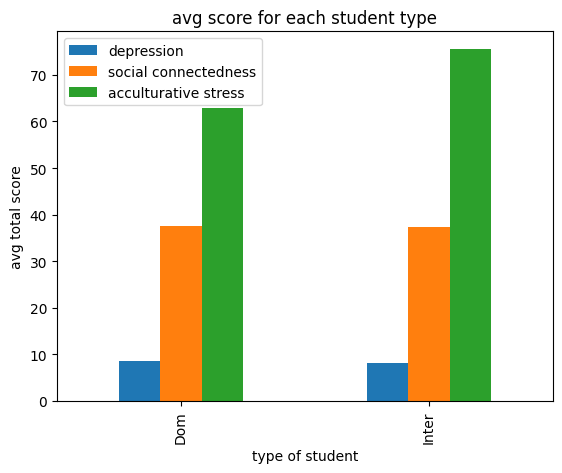

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('students.csv')


df.groupby(['inter_dom'])['todep','tosc','toas'].mean().plot(kind='bar', title='avg score for each student type')
plt.xlabel('type of student')
plt.ylabel('avg total score')
plt.legend(['depression', 'social connectedness', 'acculturative stress'])
plt.show()

The average scores for depression and social connectedness are similar among domestic and international students. However, when examining the average score for acculturative stress on the graph, it is notably higher for international students.

### 5. Final query

In [15]:
SELECT stay, inter_dom,
       ROUND(AVG(todep), 2) AS average_phq, 
       ROUND(AVG(tosc), 2) AS average_scs, 
       ROUND(AVG(toas), 2) AS average_as
FROM 'students.csv'
GROUP BY inter_dom, stay
ORDER BY stay DESC;

,stay,inter_dom,average_phq,average_scs,average_as
0,10.0,Inter,13.00,32.00,50.00
1,8.0,Inter,10.00,44.00,65.00
2,7.0,Inter,4.00,48.00,45.00
3,6.0,Inter,6.00,38.00,58.67
4,5.0,Dom,11.50,34.00,88.00
5,5.0,Inter,0.00,34.00,91.00
6,4.0,Inter,8.57,33.93,87.71
7,4.0,Dom,7.00,36.67,64.78
8,3.0,Inter,9.09,37.13,78.00
9,3.0,Dom,8.43,39.09,58.04


In [29]:

import pandas as pd
data = [
[10,13,32,50],
[8,10,44,65],
[7,4,48,45],
[6,6,38,58],
[5,0,34,91],
[4,8,33,87],
[3,9,37,78],
[2,8,37,77],
[1,7,38,72]
]
stay_depression = pd.DataFrame(data, columns=['length_of_stay', 'average_phq','average_scs','average_as'])
print(stay_depression.corr())

                length_of_stay  average_phq  average_scs  average_as
length_of_stay        1.000000     0.273703     0.148855   -0.636160
average_phq           0.273703     1.000000    -0.181039   -0.324932
average_scs           0.148855    -0.181039     1.000000   -0.521304
average_as           -0.636160    -0.324932    -0.521304    1.000000


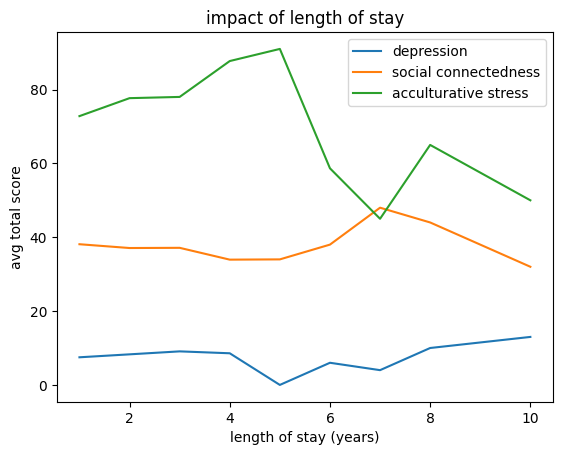

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('students.csv')


df[df['inter_dom']=='Inter'].groupby(['stay'])['todep','tosc','toas'].mean().plot(kind='line', title='impact of length of stay')

plt.xlabel('length of stay (years)')
plt.ylabel('avg total score')
plt.legend(['depression', 'social connectedness', 'acculturative stress'])

plt.show()

In conclusion, while the study identified social connectedness and acculturative stress as predictors of depression among international students, further analysis of the dataset revealed that the duration of stay does not significantly contribute to this outcome. The correlation coefficients between 'length of stay' and depression at 0.27, and social connectedness at 0.14, demonstrate weak correlations. This suggests that the duration of a student's stay in a new country does not necessarily correlate with a higher likelihood of experiencing depression.

The data presented in the initial graph challenges the theory that international students face a higher risk of mental health difficulties than the general population. Additionally, it suggests that both social connectedness (belonging to a social group) and acculturative stress (stress related to adapting to a new culture) might not be definitive predictors of depression. What's intriguing is that while the average acculturative stress is higher among international students in contrast to domestic ones, the average level of depression marginally favors domestic students, not international ones (8.61 for domestic, 8.04 for international).

Furthermore a closer examination of the graph and longitudinal data for international students indicates a gradual decrease in stress levels after a 5-year stay. This suggests a gradual adaptation to the new environment.
